In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# First we need to load our data and clean it if necessary
df_kclt = pd.read_csv('data/KCLT.csv')

In [3]:
df_kclt.head()

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
0,2014-7-1,81,70,91,67,89,56,104,1919,2012,0.00,0.10,5.91
1,2014-7-2,85,74,95,68,89,56,101,2008,1931,0.00,0.10,1.53
2,2014-7-3,82,71,93,68,89,56,99,2010,1931,0.14,0.11,2.50
3,2014-7-4,75,64,86,68,89,55,99,1933,1955,0.00,0.10,2.63
4,2014-7-5,72,60,84,68,89,57,100,1967,1954,0.00,0.10,1.65


In [4]:
df_kclt.tail()

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
360,2015-6-26,85,70,100,67,88,55,102,1979,1952,1.21,0.11,1.98
361,2015-6-27,82,71,92,67,88,56,103,2012,1954,0.55,0.11,1.86
362,2015-6-28,76,66,85,67,88,53,101,1968,1959,0.00,0.11,1.83
363,2015-6-29,73,59,87,67,88,54,104,1974,2012,0.00,0.11,2.39
364,2015-6-30,83,71,94,67,89,54,104,1962,2012,0.00,0.11,2.75


In [5]:
df_kclt.describe()

,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,61.049315,49.958904,71.630137,48.819178,70.983562,31.465753,88.728767,1953.279452,1953.989041,0.102411,0.114082,2.208904
std,16.061789,16.575533,16.450481,13.832203,13.495207,18.430656,9.961209,39.170924,33.890497,0.301195,0.013650,0.879378
min,18.000000,7.000000,26.000000,29.000000,50.000000,-5.000000,69.000000,1879.000000,1879.000000,0.000000,0.090000,0.850000
25%,47.000000,37.000000,58.000000,36.000000,58.000000,15.000000,79.000000,1918.000000,1931.000000,0.000000,0.100000,1.650000
50%,63.000000,52.000000,73.000000,48.000000,72.000000,30.000000,90.000000,1963.000000,1953.000000,0.000000,0.110000,1.980000
75%,75.000000,65.000000,86.000000,63.000000,84.000000,49.000000,98.000000,1983.000000,1984.000000,0.030000,0.120000,2.540000
max,88.000000,75.000000,100.000000,68.000000,89.000000,62.000000,104.000000,2015.000000,2015.000000,2.650000,0.150000,6.880000


In [6]:
df_kclt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   365 non-null    object 
 1   actual_mean_temp       365 non-null    int64  
 2   actual_min_temp        365 non-null    int64  
 3   actual_max_temp        365 non-null    int64  
 4   average_min_temp       365 non-null    int64  
 5   average_max_temp       365 non-null    int64  
 6   record_min_temp        365 non-null    int64  
 7   record_max_temp        365 non-null    int64  
 8   record_min_temp_year   365 non-null    int64  
 9   record_max_temp_year   365 non-null    int64  
 10  actual_precipitation   365 non-null    float64
 11  average_precipitation  365 non-null    float64
 12  record_precipitation   365 non-null    float64
dtypes: float64(3), int64(9), object(1)
memory usage: 37.2+ KB


In [7]:
type(df_kclt['date'][0])

str

None of our data appears to be missing and almost all of it is in a format we would expect. The data type for the date column is currently string but it'll be beneficial to have the date in a datetime format. And we might as well make it the index. This will make it a lot easier when working with the data and making visualizations. 

In [8]:
df_kclt['date'] = pd.to_datetime(df_kclt['date'])
df_kclt.set_index('date', inplace=True)

In [9]:
# we have a lot more data to bring in so we might as well make a funtion to help us out.
def make_dataframe(file_loc):
    '''Read CSV of weather data from file location 
    and set index as date.'''
    df_result = pd.read_csv(file_loc)
    df_result['date'] = pd.to_datetime(df_result['date'])
    df_result.set_index('date', inplace=True)
    
    return df_result

In [10]:
df_kcqt = make_dataframe('data/KCQT.csv')
df_khou = make_dataframe('data/KHOU.csv')
df_kind = make_dataframe('data/KIND.csv')
df_kjax = make_dataframe('data/KJAX.csv')
df_kmdw = make_dataframe('data/KMDW.csv')
df_knyc = make_dataframe('data/KNYC.csv')
df_kphl = make_dataframe('data/KPHL.csv')
df_kphx = make_dataframe('data/KPHX.csv')
df_ksea = make_dataframe('data/KSEA.csv')

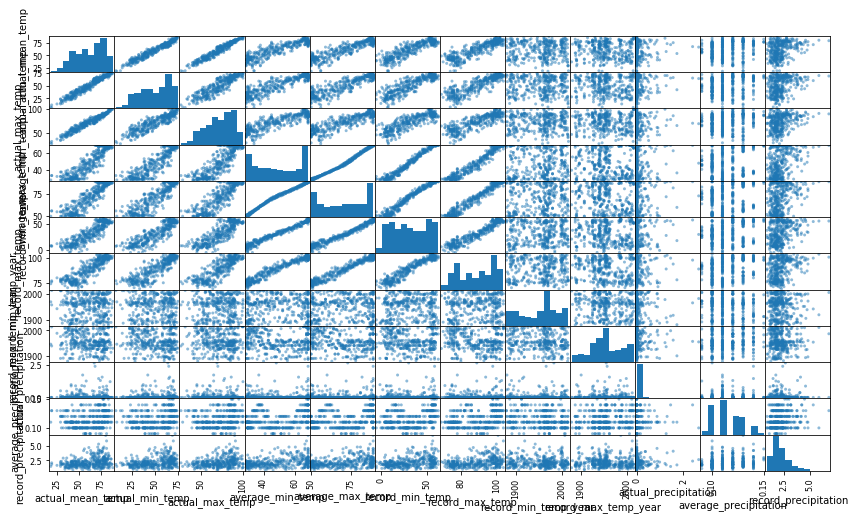

In [11]:
# let's do a quick and rough scatter matrix visualization to see if anything pops out
pd.plotting.scatter_matrix(df_kclt.loc[:,:], 
                           figsize=(14,8));

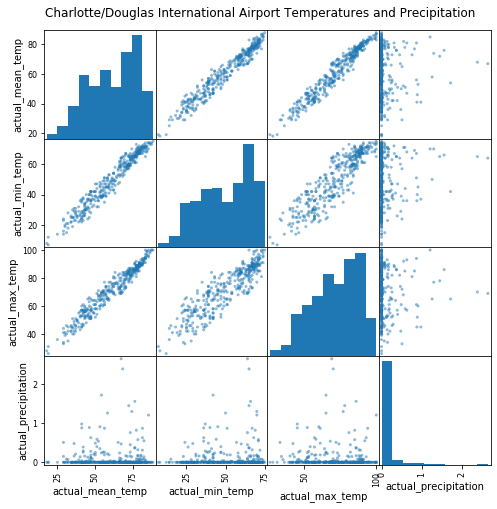

In [12]:
# let's narrow it down. Could be interesting to compare temperatures and precipitation.
pd.plotting.scatter_matrix(df_kclt.loc[:,['actual_mean_temp', 
                                               'actual_min_temp', 
                                               'actual_max_temp', 
                                               'actual_precipitation']], 
                                figsize=(8,8))
plt.suptitle('Charlotte/Douglas International Airport Temperatures and Precipitation', y=0.92);

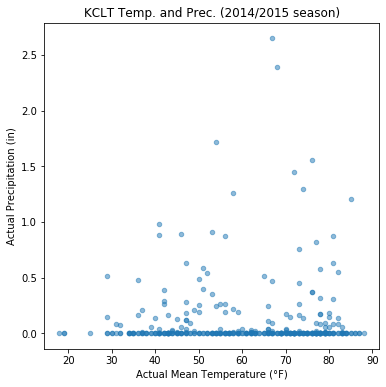

In [13]:
# let's take a closer look at temperature and precipitation
fig, ax = plt.subplots(figsize=(6,6))

x = df_kclt['actual_mean_temp']
y = df_kclt['actual_precipitation']

ax.scatter(x,
           y,
           alpha=0.5, s=20) #change dot appearance
ax.set_title('KCLT Temp. and Prec. (2014/2015 season)')
ax.set_ylabel('Actual Precipitation (in)')
ax.set_xlabel('Actual Mean Temperature (°F)');

We can see that on most days there isn't any precipitation and in general as the temperature goes up the amount of precipitation also goes up.

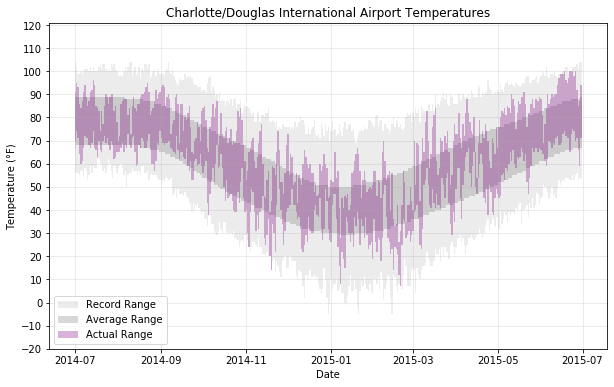

In [14]:
# let's shift our attention to temperatures only
fig, ax = plt.subplots(figsize=(10,6))

temperature_range = (-20, 121)

ax.set_title('Charlotte/Douglas International Airport Temperatures')
ax.set_ylim(temperature_range)
ax.set_yticks([x for x in range(temperature_range[0], temperature_range[1], 10)])
# ax.set_xticks()
ax.set_ylabel('Temperature (°F)')
ax.set_xlabel('Date')
ax.grid(alpha=0.5, linewidth=0.5)

# ax.plot would work well but I prefer the appearance of ax.bar in this instance
ax.bar(x=df_kclt.index, 
       height=df_kclt['record_max_temp'] - df_kclt['record_min_temp'], 
       bottom=df_kclt['record_min_temp'], 
       color='gray', alpha=0.15, width=1.0, 
       label='Record Range')

ax.bar(x=df_kclt.index, 
       height=df_kclt['average_max_temp'] - df_kclt['average_min_temp'], 
       bottom=df_kclt['average_min_temp'], 
       color='gray', alpha=0.3, width=1.0, 
       label='Average Range')

ax.bar(x=df_kclt.index, 
       height=df_kclt['actual_max_temp'] - df_kclt['actual_min_temp'], 
       bottom=df_kclt['actual_min_temp'], 
       color='purple', alpha=0.3, width=1.0, 
       label='Actual Range')

ax.legend();

In [15]:
def generate_temperature_chart(subplot_idx, df, title):
    temperature_range = (-20, 121)
    ax[subplot_idx].set_title(title)
    ax[subplot_idx].set_ylim(temperature_range)
    ax[subplot_idx].set_yticks([x for x in range(temperature_range[0], temperature_range[1], 10)])
    # ax[subplot_idx].set_xticks()
    ax[subplot_idx].set_ylabel('Temperature (°F)')
    ax[subplot_idx].set_xlabel('Date')
    ax[subplot_idx].grid(alpha=0.5, linewidth=0.5)

    # ax.plot would work well but I prefer the appearance of ax.bar in this instance
    ax[subplot_idx].bar(x=df.index, 
           height=df['record_max_temp'] - df['record_min_temp'], 
           bottom=df['record_min_temp'], 
           color='gray', alpha=0.15, width=1.0, 
           label='Record Range')

    ax[subplot_idx].bar(x=df.index, 
           height=df['average_max_temp'] - df['average_min_temp'], 
           bottom=df['average_min_temp'], 
           color='gray', alpha=0.3, width=1.0, 
           label='Average Range')

    ax[subplot_idx].bar(x=df.index, 
           height=df['actual_max_temp'] - df['actual_min_temp'], 
           bottom=df['actual_min_temp'], 
           color='purple', alpha=0.3, width=1.0, 
           label='Actual Range')

    ax[subplot_idx].legend()
    
    return None

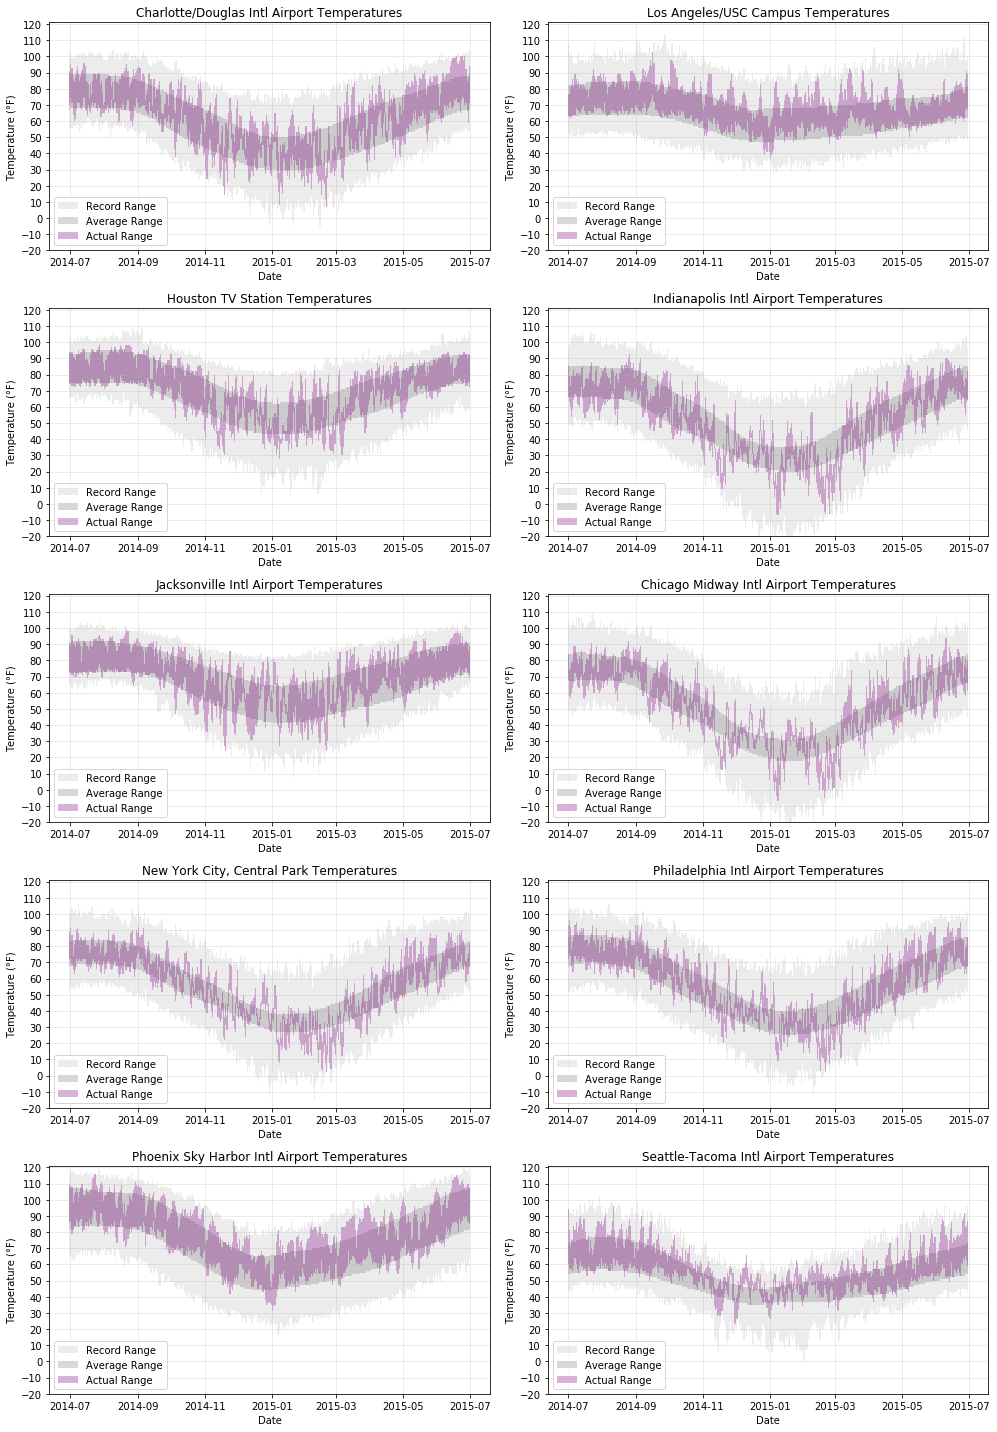

In [16]:
fig, ax = plt.subplots(5, 2, figsize=(14,20))

generate_temperature_chart((0,0), df_kclt, 'Charlotte/Douglas Intl Airport Temperatures')
generate_temperature_chart((0,1), df_kcqt, 'Los Angeles/USC Campus Temperatures')
generate_temperature_chart((1,0), df_khou, 'Houston TV Station Temperatures')
generate_temperature_chart((1,1), df_kind, 'Indianapolis Intl Airport Temperatures')
generate_temperature_chart((2,0), df_kjax, 'Jacksonville Intl Airport Temperatures')
generate_temperature_chart((2,1), df_kmdw, 'Chicago Midway Intl Airport Temperatures')
generate_temperature_chart((3,0), df_knyc, 'New York City, Central Park Temperatures')
generate_temperature_chart((3,1), df_kphl, 'Philadelphia Intl Airport Temperatures')
generate_temperature_chart((4,0), df_kphx, 'Phoenix Sky Harbor Intl Airport Temperatures')
generate_temperature_chart((4,1), df_ksea, 'Seattle-Tacoma Intl Airport Temperatures')
plt.tight_layout();

It can be really interesting to compare diurnal temperature ranges as well as temperature swings over a greater period of time. Chicago and Indianapolis temperatures are all over the place while Los Angeles and Phoenix tend to stay in a consistent ranges from day to day.

Let's change gears again and look at what years the record temperatures are from in our data set, the 2014/2015 season.

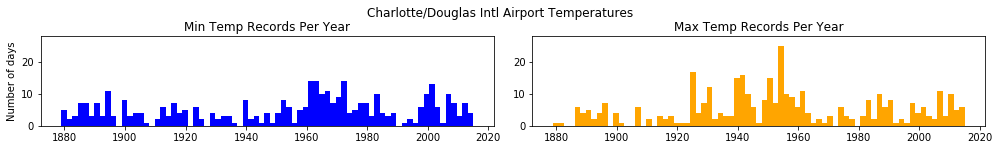

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(14,2))

ax[0].hist(df_kclt['record_min_temp_year'], 
           bins=75, 
           color='blue')
ax[0].set_title('Min Temp Records Per Year')
ax[0].set_ylim(0,28)
ax[0].set_ylabel('Number of days')

ax[1].hist(df_kclt['record_max_temp_year'], 
           bins=75, 
           color='orange')
ax[1].set_title('Max Temp Records Per Year')
ax[1].set_ylim(0,28)

plt.suptitle('Charlotte/Douglas Intl Airport Temperatures', y=1.02)
plt.tight_layout();

These histograms surprise me a little bit. I expected to see more records being set in recent history. But I guess what might be more telling is the average temperature per year. Let's check out more cities.

In [18]:
def generate_temp_records_hists(subplot_row, df, location_str):
    ax[(subplot_row,0)].hist(df['record_min_temp_year'], 
                             bins=75, 
                             color='blue')
    ax[(subplot_row,0)].set_title(f'{location_str} Min Temp. Records Per Year')
    ax[(subplot_row,0)].set_ylim(0,47)
    ax[(subplot_row,0)].set_ylabel('Number of days')

    ax[(subplot_row,1)].hist(df['record_max_temp_year'], 
                             bins=75, 
                             color='red')
    ax[(subplot_row,1)].set_title(f'{location_str} Max Temp Records Per Year')
    ax[(subplot_row,1)].set_ylim(0,47)
    
    return None

/home/sean/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/sean/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


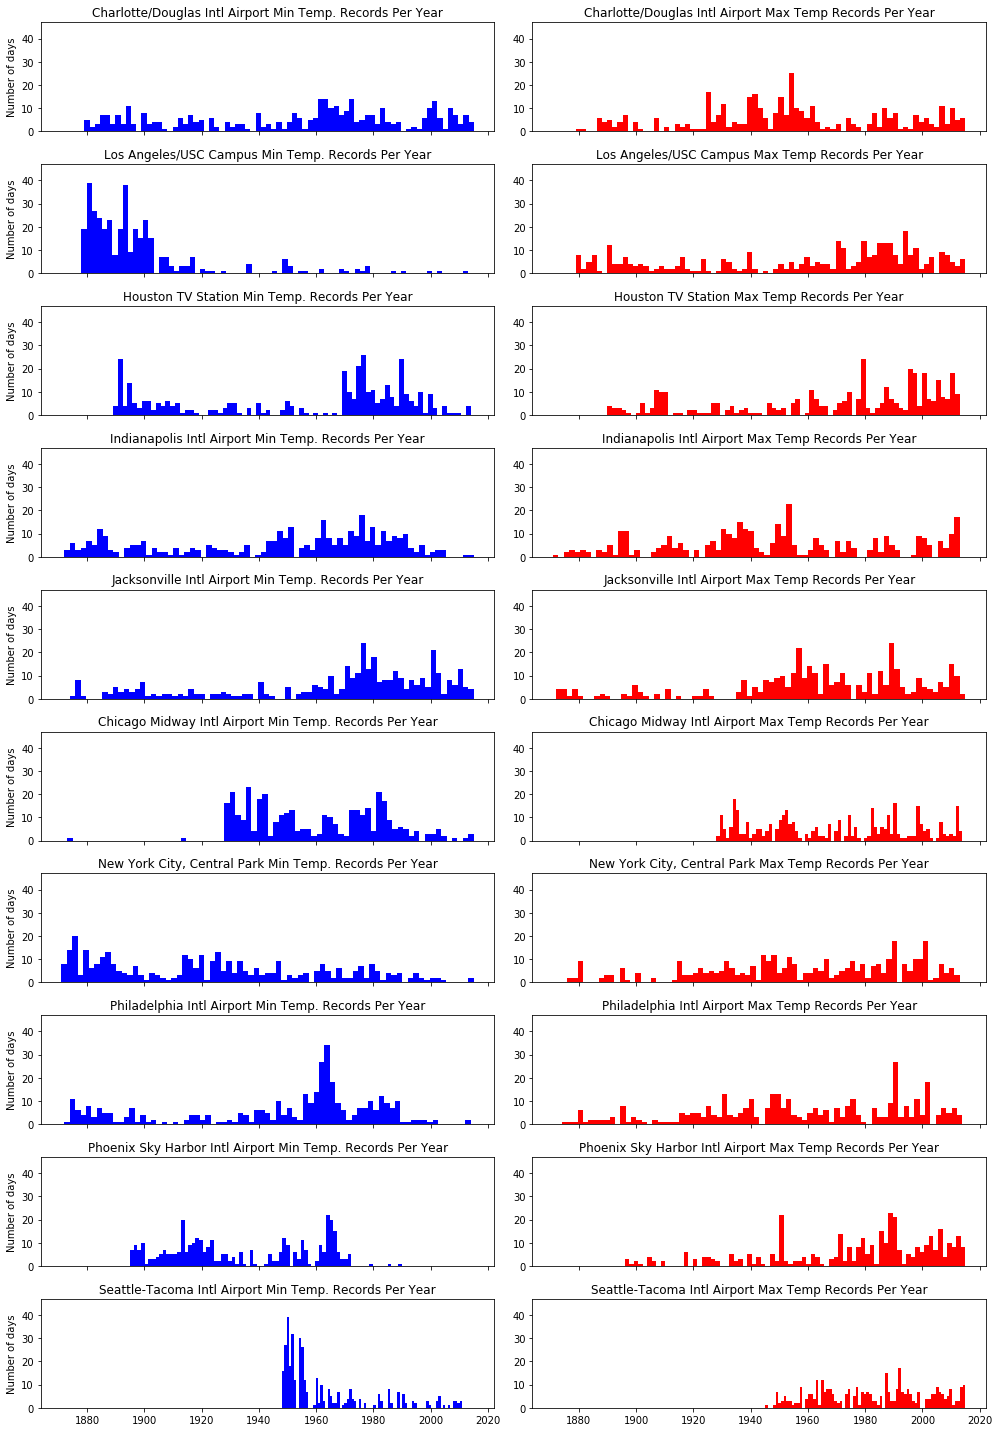

In [19]:
fig, ax = plt.subplots(10, 2, figsize=(14,20), sharex=True)

generate_temp_records_hists(0, df_kclt, 'Charlotte/Douglas Intl Airport')
generate_temp_records_hists(1, df_kcqt, 'Los Angeles/USC Campus')
generate_temp_records_hists(2, df_khou, 'Houston TV Station')
generate_temp_records_hists(3, df_kind, 'Indianapolis Intl Airport')
generate_temp_records_hists(4, df_kjax, 'Jacksonville Intl Airport')
generate_temp_records_hists(5, df_kmdw, 'Chicago Midway Intl Airport')
generate_temp_records_hists(6, df_knyc, 'New York City, Central Park')
generate_temp_records_hists(7, df_kphl, 'Philadelphia Intl Airport')
generate_temp_records_hists(8, df_kphx, 'Phoenix Sky Harbor Intl Airport')
generate_temp_records_hists(9, df_ksea, 'Seattle-Tacoma Intl Airport')

plt.tight_layout();

It's looking like each location started collecting data at different times in history. This makes it more difficult to compare record years over time. 
But we can compare some cities. Houston vs. Los Angeles minimum temperature records are especially interesting. LA set a lot of records in the late 1800's while Houston set a lot of records around 1980. 